# Aula 03 - Python

Nesta aula veremos:

1. Numpy arrays e pandas Dataframes
2. Open and export files
3. Conditional Statements
4. Loops em Python
5. Functions - def

## 1.1 Numpy arrayss

In [1]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[2.02328905e-01 6.40949600e-01]
 [2.54683608e-01 3.44331534e-01]
 [5.41943216e-01 3.51951830e-01]
 [2.50083336e-01 7.73771588e-01]
 [4.69788863e-01 9.94108117e-01]
 [7.25973356e-01 3.00073056e-04]
 [9.43325477e-01 3.72025097e-01]
 [3.95503364e-01 3.72137166e-01]
 [8.38376495e-01 1.00801257e-01]
 [7.36166592e-01 4.62436325e-02]]
(10, 2)


In [2]:

# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[210.30561619 644.54010449]
 [262.13677175 350.8882182 ]
 [546.52378363 358.4323119 ]
 [257.58250259 776.03387177]
 [475.09097411 994.16703557]
 [728.71362213  10.29707233]
 [943.89222174 378.30484615]
 [401.54833058 378.41579463]
 [839.9927297  109.7932449 ]
 [738.80492644  55.78119621]]


<class 'numpy.ndarray'>


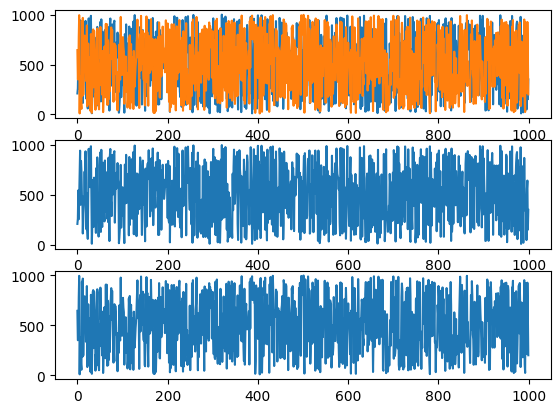

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.52754975 0.7552869  0.09109131 ... 0.57464689 0.54301623 0.41089958]
 [0.52674198 0.80972028 0.6838805  ... 0.06305519 0.61445534 0.63567914]
 [0.42470277 0.37454208 0.69291491 ... 0.42287233 0.48228391 0.38641605]
 ...
 [0.08309958 0.72384026 0.40980166 ... 0.37946506 0.8029873  0.79805606]
 [0.40855336 0.62041771 0.31197782 ... 0.8264389  0.44790903 0.38078501]
 [0.31153899 0.57558429 0.54909528 ... 0.09044332 0.50734808 0.74260755]]


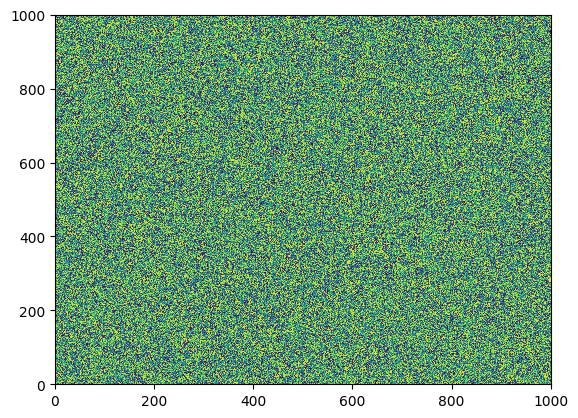

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


## PANDAS

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [8]:
# Monstrando um dataframe
df['datetime'] = dtime

In [9]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [10]:
df['random'][1:10]

1    0.727577
2    0.850817
3    0.048819
4    0.319224
5    0.811648
6    0.407355
7    0.680734
8    0.279415
9    0.470862
Name: random, dtype: float64

In [12]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [13]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.796620
2022-01-01 01:00:00,2022-01-01 01:00:00,0.727577
2022-01-01 02:00:00,2022-01-01 02:00:00,0.850817
2022-01-01 03:00:00,2022-01-01 03:00:00,0.048819
2022-01-01 04:00:00,2022-01-01 04:00:00,0.319224
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.421878
2022-12-31 20:00:00,2022-12-31 20:00:00,0.929956
2022-12-31 21:00:00,2022-12-31 21:00:00,0.021509


In [14]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

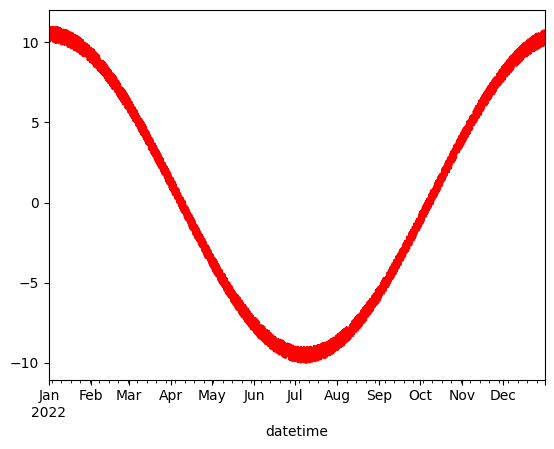

In [15]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [16]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.796620,2022,1,1,1.000000,10.796620
2022-01-01 01:00:00,2022-01-01 01:00:00,0.727577,2022,1,1,1.000000,10.727574
2022-01-01 02:00:00,2022-01-01 02:00:00,0.850817,2022,1,1,0.999999,10.850807
2022-01-01 03:00:00,2022-01-01 03:00:00,0.048819,2022,1,1,0.999998,10.048798
2022-01-01 04:00:00,2022-01-01 04:00:00,0.319224,2022,1,1,0.999996,10.319185
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.421878,2022,12,31,0.979401,10.215885
2022-12-31 20:00:00,2022-12-31 20:00:00,0.929956,2022,12,31,0.979541,10.725364
2022-12-31 21:00:00,2022-12-31 21:00:00,0.021509,2022,12,31,0.979680,9.818312


In [17]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\dados\brutos\noise_2022.csv')

In [ ]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Cecilia
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


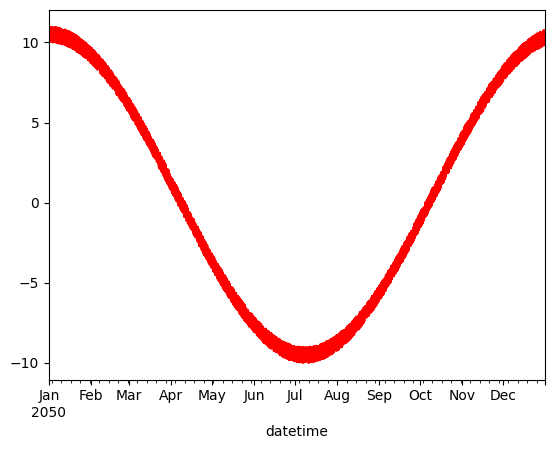

In [24]:

path = 'C:/Users/cecil/OneDrive/Documentos/CPA/ENS5173/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


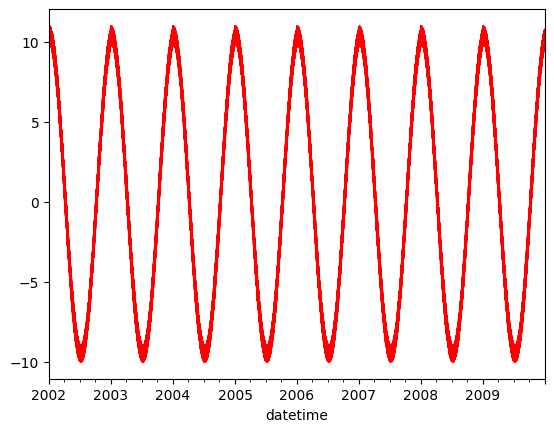

In [25]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [26]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.893096,1.000000,10.893096
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.190879,1.000000,10.190877
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.052892,0.999999,10.052882
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.585029,0.999998,10.585007
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.653426,0.999996,10.653388
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.691004,0.979401,10.485012
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.548658,0.979541,10.344066
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.948006,0.979680,10.744808


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


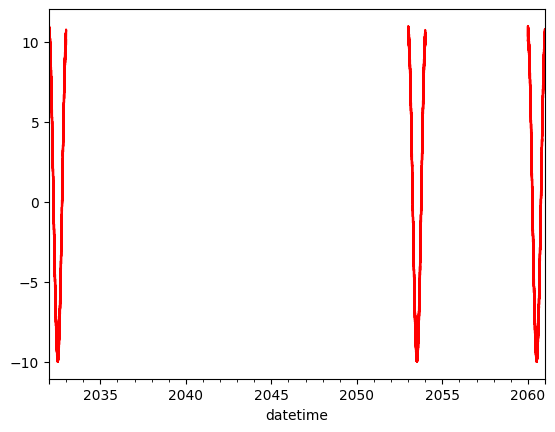

In [27]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [ ]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)